# Performance Demonstration of Ternary Search Trees (TST)

This notebook evaluates the performance of Ternary Search Trees across key operations on datasets of varying sizes. Each section contains:

In [3]:
import random
import time
import matplotlib.pyplot as plt
from ternary_search_tree import TernarySearchTree


In [2]:
# Load English words from file and strip whitespace
with open('data/search_trees/corncob_lowercase.txt') as file:
    words = [line.strip() for line in file]

## Small-Sized TST
### Insertion Performance
Let's start inserting a small dataset into our TST (up to 5000 words)

In [78]:
sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000]  # Sizes of trees to build
nr_runs = 10  # Number of benchmark runs to average timing results

# create a list of random samples for each size
samples = [
    random.sample(words, k=size) for size in sizes
]

Let's now build trees with the prespecified sizes:

In [73]:
insert_sample = random.sample(words, k=20)  # Fixed 20-word sample to test insert time
print(insert_sample)
insert_times = {}
all_times = {}

# Benchmark insert performance as tree size increases
for sample in samples:
    all_runs = []
    # Measure the time to insert 20 new words (multiple runs for averaging)
    insert_times[len(sample)] = 0.0

    # repeat the insertion, each time building new tree
    for i in range(nr_runs):
        tst = TernarySearchTree()

        random.shuffle(sample)
        # rebuild the tree with the shuffled sample
        for word in sample:
            tst.insert(word)

        # then, time how long insertion of words take
        start_time = time.time_ns()
        for word in insert_sample:
            tst.insert(word)
        end_time = time.time_ns()

        insert_times[len(sample)] += end_time - start_time
        all_runs.append((end_time-start_time))

    # Average over number of runs and convert to milliseconds
    insert_times[len(sample)] /= nr_runs * 1_000_000.0
    all_times[len(sample)] = all_runs


insert_times
all_times

['patrician', 'fishery', 'exultingly', 'exploded', 'unknown', 'dragons', 'insurmountable', 'prominence', 'pressurising', 'repentance', 'redial', 'coward', 'glottal', 'baits', 'sisters', 'unsatisfied', 'leaven', 'scoff', 'defectors', 'swells']


{100: [1085600, 0, 0, 0, 0, 0, 0, 0, 3000900, 0],
 200: [0, 1473600, 0, 0, 0, 0, 0, 0, 0, 0],
 300: [0, 0, 0, 0, 1127300, 0, 0, 0, 0, 0],
 400: [1002600, 0, 1219800, 0, 0, 0, 0, 0, 0, 0],
 500: [0, 0, 0, 0, 0, 0, 0, 0, 0, 672200],
 600: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 700: [1601600, 0, 0, 0, 0, 1740700, 1328500, 0, 0, 1416000],
 800: [1006000, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 900: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 1000: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1028600],
 2000: [0, 0, 0, 0, 0, 999600, 0, 0, 0, 0],
 3000: [644100, 1005800, 0, 0, 0, 0, 0, 0, 0, 0],
 4000: [585500, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 5000: [0, 0, 999700, 0, 0, 0, 0, 0, 0, 0]}

Ok, we see lots of Zeros flying around. Averaging over this would be misleading. It seems the resolution of time measurement we are using here is not capturing our insertion method. This suggests that inserting 20 words is too fast to be informative. Let's try again with more words:

In [79]:
insert_sample = random.sample(words, k=200)  # Increase numbe to 200-word sample to test insert time
print(insert_sample)
insert_times = {}
all_times = {}

# Benchmark insert performance as tree size increases
for sample in samples:
    all_runs = []
    # Measure the time to insert 20 new words (multiple runs for averaging)
    insert_times[len(sample)] = 0.0

    # repeat the insertion, each time building new tree
    for i in range(nr_runs):
        tst = TernarySearchTree()

        random.shuffle(sample)
        # rebuild the tree with the shuffled sample
        for word in sample:
            tst.insert(word)

        # then, time how long insertion of words take
        start_time = time.time_ns()
        for word in insert_sample:
            tst.insert(word)
        end_time = time.time_ns()

        insert_times[len(sample)] += end_time - start_time
        all_runs.append((end_time-start_time))

    # Average over number of runs and convert to milliseconds
    insert_times[len(sample)] /= nr_runs * 1_000_000.0
    all_times[len(sample)] = all_runs


insert_times
all_times

['blocks', 'cowgirls', 'illegalities', 'stunned', 'travelled', 'worrisome', 'building', 'neighbourhood', 'notorious', 'pinion', 'lioness', 'looted', 'safari', 'dryness', 'leering', 'bebop', 'maddeningly', 'inscribe', 'pulping', 'definitions', 'zips', 'traditionalists', 'schooled', 'melanin', 'anemones', 'quantity', 'antioxidants', 'legislature', 'egregious', 'indistinct', 'scanners', 'cereals', 'unavailing', 'potting', 'dilutes', 'surcharged', 'baseness', 'lancers', 'interactions', 'inflaming', 'ringless', 'curtsies', 'behaviourism', 'breasted', 'prettily', 'overflows', 'noose', 'samosas', 'treated', 'vortexes', 'pertaining', 'luminescent', 'borough', 'biplanes', 'hone', 'ion', 'privatise', 'asphyxiation', 'schema', 'converse', 'verdant', 'slurps', 'enrobe', 'numbering', 'brief', 'selfpity', 'londoner', 'choppier', 'foliage', 'whisper', 'inadequacies', 'scoreline', 'pompousness', 'renegades', 'brachiopods', 'affair', 'serenity', 'direst', 'remunerative', 'gulp', 'plus', 'cosmically', '

{100: [2156900, 0, 5491900, 4585300, 1001900, 2005300, 0, 0, 8339900, 2000600],
 200: [2269500,
  2515600,
  1376400,
  2006800,
  1008700,
  1249500,
  2509800,
  2435500,
  2021500,
  1007800],
 300: [1996200,
  2000300,
  2009600,
  982300,
  2148800,
  2008300,
  1001000,
  2668400,
  1452200,
  1996900],
 400: [2000500, 1017500, 1535400, 0, 1512900, 0, 0, 1000200, 0, 0],
 500: [3200400,
  1987700,
  1870900,
  1996900,
  2007100,
  0,
  0,
  3026600,
  1336900,
  3049500],
 600: [5031500,
  2501700,
  3023800,
  3000100,
  2000500,
  3632900,
  1959700,
  2081100,
  2022100,
  2180300],
 700: [2380500, 2008000, 1010200, 1000500, 1002200, 4044000, 0, 0, 0, 1539800],
 800: [1991200,
  2994800,
  2001800,
  2609000,
  2992700,
  2025100,
  1992700,
  3006700,
  2001500,
  2997100],
 900: [1988100,
  1999400,
  2001600,
  2999900,
  1999400,
  2003000,
  1999500,
  1998800,
  94829400,
  999700],
 1000: [2000900,
  2000600,
  2010600,
  2009800,
  1004100,
  1999600,
  1996800,
  1994

Ok, this looks more realistic. Now we can visualize the results:

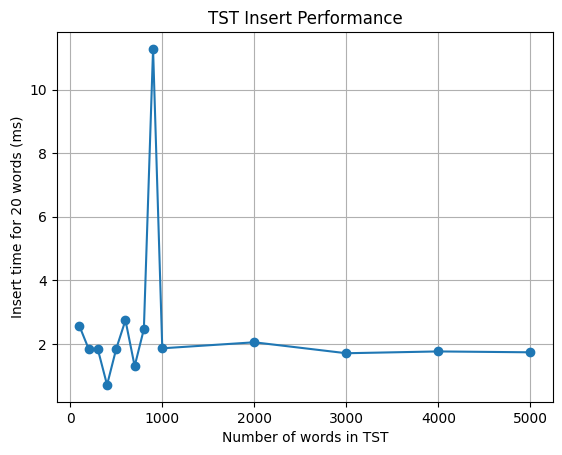

In [ ]:
plt.figure()
plt.plot(insert_times.keys(), insert_times.values(), marker='o')
plt.title("TST Insert Performance")
plt.xlabel("Number of words in TST")
plt.ylabel("Insert time for 20 words (ms)")
plt.grid(True)
plt.savefig("results/insert_tst_small.png")

The TST shows mostly stable insertion times for increasing tree size. We can also vary the size of words to be inserted.

In [81]:
nr_runs = 10  # number of times to repeat each measurement
base_tree_size = 5000  # Fixed size of the tree
insert_sizes = [10, 50, 100, 200, 500, 1000, 2000, 3000, 4000]  # Varying insert sizes

# fixed base tree
base_sample = random.sample(words, k=base_tree_size)

insert_times = {}
all_times = {}

for insert_size in insert_sizes:
    insert_sample = random.sample(words, k=insert_size)
    insert_times[insert_size] = 0.0
    all_runs = []

    for _ in range(nr_runs):
        tst = TernarySearchTree()

        # build the base tree with 5000 words
        shuffled_base = base_sample[:]
        random.shuffle(shuffled_base)
        for word in shuffled_base:
            tst.insert(word)

        # time how long it takes to insert insert_size new words
        start_time = time.perf_counter()
        for word in insert_sample:
            tst.insert(word)
        end_time = time.perf_counter()

        duration_ms = (end_time - start_time) * 1000
        insert_times[insert_size] += duration_ms
        all_runs.append(duration_ms)

    # average over number of runs
    insert_times[insert_size] /= nr_runs
    all_times[insert_size] = all_runs


print("Average insert times (ms):", insert_times)
print("All run durations (ms):", all_times)


Average insert times (ms): {10: 0.17737001180648804, 50: 0.6128299981355667, 100: 0.9932099957950413, 200: 1.6883899981621653, 500: 4.638160002650693, 1000: 8.590179996099323, 2000: 17.599290009820834, 3000: 34.732960001565516, 4000: 55.69711000425741}
All run durations (ms): {10: [0.1694000093266368, 0.1996000064536929, 0.21760002709925175, 0.16420002793893218, 0.18470000941306353, 0.1503999810665846, 0.20920002134516835, 0.1588000450283289, 0.14109996845945716, 0.17870002193376422], 50: [0.5778000340797007, 0.5790999857708812, 1.7245999770238996, 0.4697000258602202, 0.4393999697640538, 0.43130002450197935, 0.42639998719096184, 0.48669998068362474, 0.5380000220611691, 0.4552999744191766], 100: [0.8090999908745289, 0.9550000540912151, 0.8902999688871205, 0.8373999735340476, 0.8718000026419759, 0.9334000060334802, 0.824199989438057, 0.8543999865651131, 1.943300012499094, 1.013199973385781], 200: [1.5106999780982733, 1.6272999928332865, 1.590800005942583, 1.589599996805191, 1.64510001195

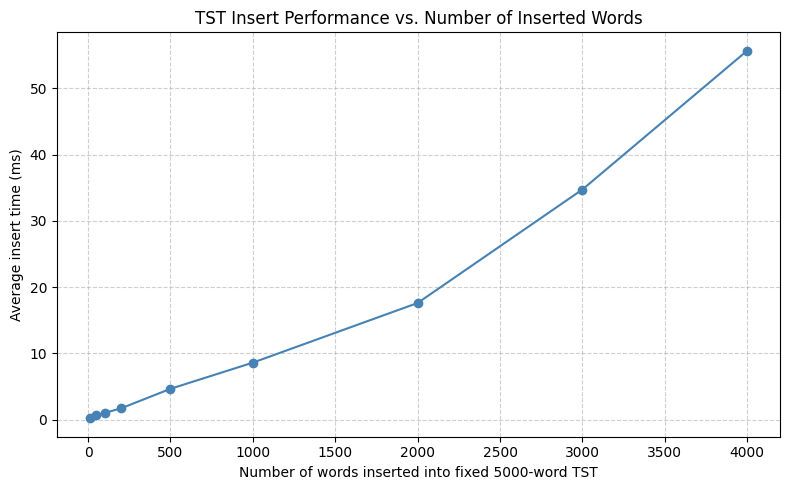

In [83]:
plt.figure(figsize=(8, 5))
plt.plot(insert_times.keys(), insert_times.values(), marker='o', linestyle='-', color='steelblue')
plt.title("TST Insert Performance vs. Number of Inserted Words")
plt.xlabel("Number of words inserted into fixed 5000-word TST")
plt.ylabel("Average insert time (ms)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("results/insertion_fixed_tree.png")
plt.show()

When adding an increasing number of words into our TST, we can see a linear trend of time. The TST takes fairly long to insert large numbers of words. Considering the speed of python sets (see figure insert_comparison.png), this is inefficient.

## Large-Sized TST

We tested our TST on a large dataset (50.000 words). The results are in the file benchmarking.py. However, we must note that we did not consider samples larger than this (up to 100.000 or 1.000.000 words). We did not run into any recursion errors in our performance tests, but it must be expected that for super-large datasets and increasing recursion-depth, this will most probably lead to problems due to maximum recursion depth. In this case, recursion-based implmenetations of TST's may not be the best solution and other approaches such as stack-based implementations should be considered.


------------------------------------------------------------------------------------------
Time and Space Complexity of Ternary Search Tree (TST)
------------------------------------------------------------------------------------------

Time Complexity (n = number of words, L = average word length):

- Insertion:
    - Worst Case: O(L * n) → if the tree becomes unbalanced (like a linked list)
    - Average Case: O(L * log n) → assuming a roughly balanced ternary tree
    - Best Case: O(L) → for inserting words into an optimally balanced TST

- Search:
    - Worst Case: O(L * n) → in a degenerate (unbalanced) tree
    - Average Case: O(L * log n)
    - Best Case: O(L)

- Prefix Search:
    - TST supports prefix search naturally and efficiently in O(L) time (to find prefix) + O(k) to collect matching strings.

Space Complexity:

- O(n * L), where:
    - n = number of distinct words
    - L = average length of each word
    - Each character may be stored in a separate node, but space is reused for common prefixes.
- Additional memory for three pointers (left, mid, right) per node.

Comparison:
- Python's set() has O(1) average insert and search time using hash tables, but does not support prefix search.
- TST trades off speed for space efficiency and support for prefix queries.


------------------------------------------------------------------------------------------
Interpretation: TST Search Performance vs Python Set
------------------------------------------------------------------------------------------

TST Search Performance (results/search_tst.png).
This plot shows the average time to search 20 words in a Ternary Search Tree (TST) as the number of inserted words increases.

- We observe that search time increases slightly as the tree size grows, which is expected since deeper or more complex trees take longer to traverse.
- The increase is not linear and fluctuates slightly due to randomness in tree structure from sampling.
- Overall, TST maintains reasonable search performance, typically under 0.25 ms for 20 lookups, even for trees with 50,000 words.

Set vs TST Search Comparison (results/search_comparison.png)
- Python set (which uses hash-based lookup) performs the search in effectively zero milliseconds — near-instant due to constant-time average-case complexity 𝑂(1).
- In contrast, TST takes approximately 2 milliseconds to search the same 100 words.
- This highlights a key point: TSTs are slower than hash sets for exact searches, but they support prefix-based or partial matches, which sets do not.

Conclusion: TSTs are useful when we need structured word storage or prefix queries (e.g., autocomplete), but for plain exact lookups, Python sets are significantly faster.